In [3]:
import os
import shutil
import cv2 
import matplotlib.pyplot as plt
from glob import glob
import random

Looking at how many unique dimensions there are

In [7]:
shapes = set()
for fp in glob("PretrainingDataset/*/images/*.jpg"):
    #print(fp)
    im = cv2.imread(fp)
    shapes.add(im.shape)
    

In [8]:
shapes

{(234, 416, 3),
 (312, 416, 3),
 (416, 312, 3),
 (416, 416, 3),
 (426, 640, 3),
 (480, 640, 3),
 (640, 480, 3),
 (640, 640, 3)}

In [213]:
# Sample some of the images that are not square
for fp in glob("PretrainingDataset/A/images/*.jpg"):
    im = cv2.imread(fp)
    if im.shape != (416, 416, 3) and im.shape != (640,640,3):
        print(fp, im.shape)


PretrainingDataset/A/images\13_Alphabet-A-0_jpg.rf.cbc922eb29b8d9ab01c3fbc0ea6e8baa.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-105_jpg.rf.bfd842ee795ea75e5a3af80186da7e52.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-108_jpg.rf.c6e18a85b6de17ca390b807eb893fbf8.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-109_jpg.rf.011171a8d1deec7304a2807f477b58e8.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-10_jpg.rf.32e44768c0895e410b2bd2d72eb8a3c0.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-110_jpg.rf.ffe24c383a65e6b7ef0a7775f727c841.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-111_jpg.rf.d12f93818e5c48888f36950261677568.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-112_jpg.rf.bfc556f9a5587f860432e310dd6033af.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-113_jpg.rf.9a7cba12a1312bb293bef152dd09cd72.jpg (426, 640, 3)
PretrainingDataset/A/images\13_Alphabet-A-115_jpg.rf.246963ad09f74f

## Resizing Non-Square Images To Square Images

In [ ]:
"""
not square -> pad and resize to 416, bbox pad accordingly

square -> resize to 416, bbox resize accordingly
"""

Drawing bounding box and center dot for a sampled image to visualize it

['20 0.51484375 0.7488262910798122 0.0921875 0.3380281690140845\n']
20 0.51484375 0.7488262910798122 0.0921875 0.3380281690140845

329 319 59 144


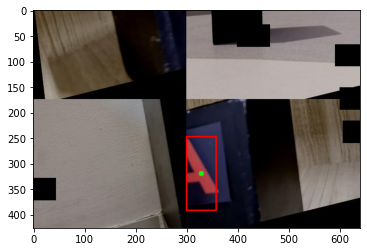

In [287]:
a = "13_Alphabet-A-108_jpg.rf.c6e18a85b6de17ca390b807eb893fbf8"

img_fp = f'PretrainingDataset/A/images/{a}.jpg'
anno_fp = f'PretrainingDataset/A/labels/{a}.txt'

with open(anno_fp) as f:
    bboxes = f.readlines()
print(bboxes)

img = cv2.imread(f'PretrainingDataset/A/images/{a}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H,W,_ = img.shape

for bbox in bboxes:
    _, x,y,w,h = bbox.split(" ")
    print(_, x,y,w,h)
    x = int(float(x)*W)
    y = int(float(y)*H)
    w = int(float(w)*W) 
    h = int(float(h)*H)
    print(x,y,w,h)
    cv2.rectangle(img, (x-w//2, y-h//2), (x+w//2, y+h//2), (255,0,0), 2)
    cv2.circle(img,(x,y), 5, (0,255,0), -1)
plt.imshow(img)


['28 0.07692307692307693 0.5841346153846154 0.15625 0.2403846153846154\n', '28 0.9711538461538461 0.6466346153846154 0.052884615384615384 0.11298076923076923\n']
28 0.07692307692307693 0.5841346153846154 0.15625 0.2403846153846154

32 243 65 100
28 0.9711538461538461 0.6466346153846154 0.052884615384615384 0.11298076923076923

404 269 22 47


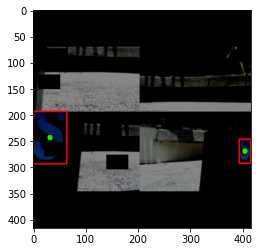

In [99]:
a = "13_picam---Alphabet-S-89_jpg.rf.2864fa3d82e2e482bfa625d72ba3475d"

img_fp = f'PretrainingDataset/Multiple/images/{a}.jpg'
anno_fp = f'PretrainingDataset/Multiple/labels/{a}.txt'

with open(anno_fp) as f:
    bboxes = f.readlines()
print(bboxes)

img = cv2.imread(f'PretrainingDataset/Multiple/images/{a}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H,W,_ = img.shape

for bbox in bboxes:
    _, x,y,w,h = bbox.split(" ")
    print(_, x,y,w,h)
    x = int(float(x)*W)
    y = int(float(y)*H)
    w = int(float(w)*W) 
    h = int(float(h)*H)
    print(x,y,w,h)
    cv2.rectangle(img, (x-w//2, y-h//2), (x+w//2, y+h//2), (255,0,0), 2)
    cv2.circle(img,(x,y), 5, (0,255,0), -1)
plt.imshow(img)

Draft script for resizing with padding

Original H: 416 W: 416
0 0
20 0.5144230769230769 0.6634615384615384 0.09134615384615384 0.22355769230769232
213 276 38 93


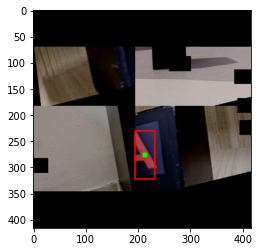

In [11]:
# img_fp = 'PretrainingDataset/A/images/20_20220826_094556_jpg.rf.e28459ef2bb1a01bab2afd4261de1cce.jpg' # 312 x 416
# anno_fp = 'PretrainingDataset/A/labels/20_20220826_094556_jpg.rf.e28459ef2bb1a01bab2afd4261de1cce.txt' # 312 x 416

# img_fp = 'PretrainingDataset/A/images/20_20220824_013015_jpg.rf.8bd868f24b3abd237bb7405da90c26a2.jpg' # 416 x 312
# anno_fp = 'PretrainingDataset/A/labels/20_20220824_013015_jpg.rf.8bd868f24b3abd237bb7405da90c26a2.txt' # 416 x 312

# img_fp = 'PretrainingDataset/A/images/20_indoor_temp_52_jpg.rf.f01114677beead3b360a7a73c9763f19.jpg' # 234 x 416
# anno_fp = 'PretrainingDataset/A/labels/20_indoor_temp_52_jpg.rf.f01114677beead3b360a7a73c9763f19.txt' # 234 x 416

# img_fp = 'PretrainingDataset/B/images/13_picam---Nine-46_jpg.rf.82d4a8296d277e621d77e28e7ececd7f.jpg' # 426 x 640
# anno_fp = 'PretrainingDataset/B/labels/13_picam---Nine-46_jpg.rf.82d4a8296d277e621d77e28e7ececd7f.txt' # 426 x 640

img_fp = f'PretrainingDataset/A/images/{a}.jpg'
anno_fp = f'PretrainingDataset/A/labels/{a}.txt'

with open(anno_fp) as f:
    bboxes = f.readlines()

img = cv2.imread(f'PretrainingDataset/A/images/{a}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
old_H, old_W, _ = img.shape
print(f"Original H: {old_H} W: {old_W}")

img, top, bottom, left, right = resize_with_pad(img, (416,416), (0,0,0))
assert top == bottom and left == right
if left != 0:
    w_adder = left
else:
    w_adder = 0

if top != 0:
    h_adder = top
else:
    h_adder = 0
    
#w_adder, h_adder = (416-H)/(2*416), (416-W)/(2*416)
H,W = 416,416
print(w_adder, h_adder)

for bbox in bboxes:
    _, x,y,w,h = bbox.split(" ")
    print(_, x,y,w,h)
    if old_H <= H and old_W <= W:
        x = int((float(x) )*old_W) + w_adder
        w = int((float(w) )*old_W) 
        y = int((float(y))*old_H)+h_adder 
        h = int((float(h) )*old_H)
    else:
        if w_adder != 0:
            if old_W > W and old_H > H:
                x = int((float(x))*(416-2*w_adder))+w_adder 
                w = int((float(w))*(416-2*w_adder))
            else:
                x = int((float(x))*old_W*(416-2*w_adder)/W)+w_adder 
                w = int((float(w))*old_W*(416-2*w_adder)/W)
        else:
            x = int((float(x))*W)
            w = int((float(w))*(W))
        if h_adder != 0:
            if old_W > W and old_H > H:
                y = int((float(y))*(416-2*h_adder))+h_adder 
                h = int((float(h))*(416-2*h_adder)) 
            else:
                y = int((float(y))*old_H*(416-2*h_adder)/H)+h_adder 
                h = int((float(h))*old_H*(416-2*h_adder)/H)  # do smth
        else:
            y = int((float(y))*H)
            h = int((float(h))*(H)) 
        
       
    print(x,y,w,h)
    cv2.rectangle(img, (x-w//2, y-h//2), (x+w//2, y+h//2), (255,0,0), 2)
    cv2.circle(img,(x,y), 5, (0,255,0), -1)

plt.imshow(img)


In [7]:
def resize_with_pad(image,new_shape,padding_color):
    """Maintains aspect ratio and resizes with padding.
    Params:
        image: Image to be resized.
        new_shape: Expected (width, height) of new image.
        padding_color: Tuple in BGR of padding color
    Returns:
        image: Resized image with padding
    """
    original_shape = (image.shape[1], image.shape[0])
    ratio = float(max(new_shape))/max(original_shape)
    new_size = tuple([int(x*ratio) for x in original_shape])
    image = cv2.resize(image, new_size)
    delta_w = new_shape[0] - new_size[0]
    delta_h = new_shape[1] - new_size[1]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
    return image, top, bottom, left, right

## Actual Resizing with Padding and Updating Annotations

In [97]:
for fp in glob("PretrainingDataset/Multiple/images/*.jpg"):
    img_fp = fp
    anno_fp = img_fp.replace("images","labels").replace(".jpg",".txt")
    #print(img_fp, anno_fp)

    img = cv2.imread(img_fp)
    old_H, old_W, _ = img.shape
    if old_H == old_W:
        if old_H != 416:
            img = cv2.resize(img,(416, 416))
            cv2.imwrite(img_fp, img)
        else:
            continue
    else:
        with open(anno_fp) as f:
            bboxes = f.readlines()
            
        img, top, bottom, left, right = resize_with_pad(img, (416,416), (0,0,0))
        cv2.imwrite(img_fp, img)
        assert top == bottom and left == right
        if left != 0:
            w_adder = left
        else:
            w_adder = 0

        if top != 0:
            h_adder = top
        else:
            h_adder = 0

        H,W = 416,416
        
        with open(anno_fp, 'w') as f:
            for bbox in bboxes:
                clx, x,y,w,h = bbox.split(" ")
                #print(_, x,y,w,h)
                if old_H <= H and old_W <= W:
                    x = int((float(x) )*old_W) + w_adder
                    w = int((float(w) )*old_W) 
                    y = int((float(y))*old_H)+h_adder 
                    h = int((float(h) )*old_H)
                else:
                    if w_adder != 0:
                        if old_W > W and old_H > H:
                            x = int((float(x))*(416-2*w_adder))+w_adder 
                            w = int((float(w))*(416-2*w_adder))
                        else:
                            x = int((float(x))*old_W*(416-2*w_adder)/W)+w_adder 
                            w = int((float(w))*old_W*(416-2*w_adder)/W)
                    else:
                        x = int((float(x))*W)
                        w = int((float(w))*(W))
                    if h_adder != 0:
                        if old_W > W and old_H > H:
                            y = int((float(y))*(416-2*h_adder))+h_adder 
                            h = int((float(h))*(416-2*h_adder)) 
                        else:
                            y = int((float(y))*old_H*(416-2*h_adder)/H)+h_adder 
                            h = int((float(h))*old_H*(416-2*h_adder)/H)  # do smth
                    else:
                        y = int((float(y))*H)
                        h = int((float(h))*(H)) 
        
        
                f.write(f"{clx} {x/416} {y/416} {w/416} {h/416}\n")
        



# Changing Hue of Images to Change Font Color

In [100]:
def hueAdder(filepath, value, savepath=None, show=True, save=False):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    hue = img_hsv[:,:,0]
    hue = hue + value
    cond = hue[:, :] > 180
    hue[cond] = hue[cond] - 180
    img_hsv[:,:,0] = hue
    im = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    if show: 
        print("Before")
        plt.imshow(img)
        plt.show()
        print("After")
        plt.imshow(im)
        plt.show()
    if save: 
        assert savepath != None
        cv2.imwrite(savepath, im)
    

flag = 1
for fp in glob("PretrainingDataset/Multiple/images/*.jpg"):
    if flag == 1:
        val = random.randint(30,170)
        #print(val)
        hueAdder(fp,val, savepath=fp, show=False, save=True)
    flag ^= 1
    

In [67]:
# Put into train, valid, test folders
# Put write data.yaml

ogLabelDict = {
    'A': 20,
    'B': 21,
    'C': 22,
    'D': 23,
    'E': 24,
    'F': 25,
    'G': 26,
    'H': 27,
    'S': 28,
    'T': 29,
    'U': 30,
    'V': 31,
    'W': 32,
    'X': 33,
    'Y': 34,
    'Z': 35,
    'Up': 36,
    'Down': 37,
    'Right': 38,
    'Left': 39,
    'Stop': 40,
    'One': 11,
    'Two': 12,
    'Three': 13,
    'Four': 14,
    'Five': 15,
    'Six': 16,
    'Seven': 17,
    'Eight': 18,
    'Nine': 19,
    'Box': 1,
    'Bullseye': 2,
    'NULL': 3
}

newLabelDict = {
    20: 0,
    21: 1,
    22: 2,
    23: 3,
    24: 4,
    25: 5,
    26: 6,
    27: 7,
    28: 8,
    29: 9,
    30: 10,
    31: 11,
    32: 12,
    33: 13,
    34: 14,
    35: 15,
    36: 16,
    37: 17,
    38: 18,
    39: 19,
    40: 20,
    11: 21,
    12: 22,
    13: 23,
    14: 24,
    15: 25,
    16: 26,
    17: 27,
    18: 28,
    19: 29,
    1: 30,
    2: 31,
    3: 32,
}

In [68]:
len(glob("PretrainingDataset/*/images/*.jpg"))

98504

In [ ]:
test: 8504
valid: 5000
train: 85000

In [79]:
# glob("PretrainingDataset/*/images/*.jpg")
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(glob("PretrainingDataset/*/images/*.jpg"), test_size=8504, random_state=1)


In [82]:
X_train, X_val = train_test_split(X_train, test_size=2500, random_state=1)

In [84]:
len(X_train), len(X_val), len(X_test)

(87372, 2500, 8504)

In [85]:
X_train[:10]

['PretrainingDataset\\W\\images\\20_20220923_085147_jpg.rf.e5fcb9a13cde16efaf4a1927ed097005.jpg',
 'PretrainingDataset\\Seven\\images\\4_IMG_2578_JPG.rf.268ffd1562bcd652afbc4ffd680cef87.jpg',
 'PretrainingDataset\\Eight\\images\\16_IMG20220201132542_jpg.rf.ec37afb61f9deefa3c96b16227448644.jpg',
 'PretrainingDataset\\One\\images\\4_IMG_2235_JPG.rf.1c5e86098103411f0964c8cef1cd64bc.jpg',
 'PretrainingDataset\\One\\images\\1_photo_2021-09-07_17-11-49--8-_jpg.rf.2071b011edecdb3616eb8d44e9e019d6.jpg',
 'PretrainingDataset\\A\\images\\9_IMG_5822_JPG.rf.00364da6589f7445e7e9371685015361.jpg',
 'PretrainingDataset\\Multiple\\images\\13_Alphabet-F-56_jpg.rf.cc6212b0355fb6d69a5419e003e9114a.jpg',
 'PretrainingDataset\\C\\images\\1_IMG_20210907_222017_jpg.rf.a449167806c4bc14dce40c6d70580295.jpg',
 'PretrainingDataset\\F\\images\\6_20210911_022517_jpg.rf.88f55244fd0768b4423c192650bc7a8c.jpg',
 'PretrainingDataset\\Left\\images\\8_IMG_1213_jpg.rf.606f01007c68e5ccb24daa832639d9ed.jpg']

In [102]:
for fp in X_train:
    img_fp = fp
    anno_fp = img_fp.replace("\\images","\\labels").replace(".jpg",".txt")
    piece = img_fp.split("\\")[-1]
    new_anno_fp = f"Dataset/train/labels/{piece[:-4]}.txt"
    
    shutil.copy(img_fp, f"Dataset/train/images/{piece}")
    with open(anno_fp) as f:
        bboxes = f.readlines()
        
    with open(new_anno_fp, 'w') as f:
        for bbox in bboxes:
            try:
                clx, x,y,w,h = bbox.split(" ")
            except:
                print(anno_fp, bbox)
                break
            new_clx = newLabelDict[int(clx)]
            f.write(f"{new_clx} {x} {y} {w} {h}")


PretrainingDataset\Bullseye\labels\19_20220822_142545-0-_jpg.rf.a4d34063f5197ec93c70d15bad8298d5.txt 2 0.23649390625 0.5367516234374999 0.2535063234375 0.5391425625 0.26839202812499996 0.539521428125 0.30206233125000004 0.5433969078125 0.3235639609375 0.54470558125 0.3425847125 0.5465222015625 0.36018772499999996 0.548139534375 0.37211996875 0.5489599296875001 0.40224585937499996 0.5506240921875001 0.4032051 0.535419946875 0.41035832499999997 0.46670883124999996 0.4171020484375 0.394973553125 0.437132546875 0.2168226234375 0.2648761515625 0.21931346875000002 0.2608029953125 0.2677740359375 0.256672553125 0.3108793703125 0.2512449125 0.3769301890625 0.24699605 0.417449128125 0.2413309171875 0.4714743671875 0.2402701875 0.49616626718749995 0.23649390625 0.5367516234374999

PretrainingDataset\Bullseye\labels\19_20220822_142545-0-_jpg.rf.5718dd4ea6c81bbe2c39bab313f33894.txt 2 0.2498932390625 0.590734509375 0.2670309984375 0.5895361203125 0.281670184375 0.5868117953125 0.31541046875 0.58360

['22 0.4807692307692308 0.49278846153846156 0.5204326923076923 0.7692307692307693\n']
22 0.4807692307692308 0.49278846153846156 0.5204326923076923 0.7692307692307693

200 205 216 320


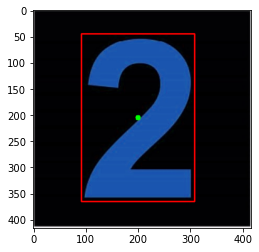

In [103]:
a = "1_2_PNG.rf.8b14f8e1327bacdceaad57b55226c655"

img_fp = f'Dataset/train/images/{a}.jpg'
anno_fp = f'Dataset/train/labels/{a}.txt'

with open(anno_fp) as f:
    bboxes = f.readlines()
print(bboxes)

img = cv2.imread(f'Dataset/train/images/{a}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H,W,_ = img.shape

for bbox in bboxes:
    _, x,y,w,h = bbox.split(" ")
    print(_, x,y,w,h)
    x = int(float(x)*W)
    y = int(float(y)*H)
    w = int(float(w)*W) 
    h = int(float(h)*H)
    print(x,y,w,h)
    cv2.rectangle(img, (x-w//2, y-h//2), (x+w//2, y+h//2), (255,0,0), 2)
    cv2.circle(img,(x,y), 5, (0,255,0), -1)
plt.imshow(img)

In [104]:
for fp in X_test:
    img_fp = fp
    anno_fp = img_fp.replace("\\images","\\labels").replace(".jpg",".txt")
    piece = img_fp.split("\\")[-1]
    new_anno_fp = f"Dataset/test/labels/{piece[:-4]}.txt"
    
    shutil.copy(img_fp, f"Dataset/test/images/{piece}")
    with open(anno_fp) as f:
        bboxes = f.readlines()
        
    with open(new_anno_fp, 'w') as f:
        for bbox in bboxes:
            try:
                clx, x,y,w,h = bbox.split(" ")
            except:
                print(anno_fp, bbox)
                break
            new_clx = newLabelDict[int(clx)]
            f.write(f"{new_clx} {x} {y} {w} {h}")

In [105]:
for fp in X_val:
    img_fp = fp
    anno_fp = img_fp.replace("\\images","\\labels").replace(".jpg",".txt")
    piece = img_fp.split("\\")[-1]
    new_anno_fp = f"Dataset/valid/labels/{piece[:-4]}.txt"
    
    shutil.copy(img_fp, f"Dataset/valid/images/{piece}")
    with open(anno_fp) as f:
        bboxes = f.readlines()
        
    with open(new_anno_fp, 'w') as f:
        for bbox in bboxes:
            try:
                clx, x,y,w,h = bbox.split(" ")
            except:
                print(anno_fp, bbox)
                break
            new_clx = newLabelDict[int(clx)]
            f.write(f"{new_clx} {x} {y} {w} {h}")

In [107]:
len(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Up', 'Down', 'Right', 'Left', 'Stop', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Box', 'Bullseye', 'NULL'])


33

# Subset Dataset

In [111]:
train_subset

['Dataset/Train/images\\6_20210910_220541_jpg.rf.9db705c50a12724ffdff391029fd8b0d.jpg',
 'Dataset/Train/images\\1_IMG_20211007_011001_jpg.rf.775d8e41b021797648f0db4e974941d3.jpg',
 'Dataset/Train/images\\16_IMG_8937_jpg.rf.771a6683ffb2360233cb131d2f83e4f3.jpg',
 'Dataset/Train/images\\6_20210911_005142_jpg.rf.1c6b94e43601584e7819291d8ec2acac.jpg',
 'Dataset/Train/images\\13_Alphabet-G-89_jpg.rf.57973db6fd431a8b50a814b13c27ad83.jpg',
 'Dataset/Train/images\\7_up1_img3_jpg.rf.bfdc08295de96160a67d36fa1c8d21b1.jpg',
 'Dataset/Train/images\\4_V0059_jpg.rf.42f2a73be0ad919aa4328f160ad6dc0e.jpg',
 'Dataset/Train/images\\8_2382022204352_jpg.rf.1913b357ecc34a0271ed317740f8278d.jpg',
 'Dataset/Train/images\\20_20220826_095221_jpg.rf.47c712b9b99f620a0e26e30dc44eae71.jpg',
 'Dataset/Train/images\\5_test_104_jpg.rf.54c0ccf6175f349f0d4de53160665a84.jpg',
 'Dataset/Train/images\\7_IMG_20210915_214259_jpg.rf.797b58767c9ecc7bda9b59c9b77f5484.jpg',
 'Dataset/Train/images\\17_IMG_0815_JPG.rf.99a9f2ee95381

In [112]:
train_imgs = glob("Dataset/Train/images/*.jpg")
train_subset = random.sample(train_imgs, len(train_imgs)//10)
for fp in train_subset:
    img_fp = fp
    anno_fp = fp.replace("images","labels").replace(".jpg", ".txt")
    shutil.copy(img_fp, img_fp.replace("Dataset","Subset"))
    shutil.copy(anno_fp, anno_fp.replace("Dataset","Subset"))

In [113]:
test_imgs = glob("Dataset/Test/images/*.jpg")
test_subset = random.sample(test_imgs, len(test_imgs)//10)
for fp in test_subset:
    img_fp = fp
    anno_fp = fp.replace("images","labels").replace(".jpg", ".txt")
    shutil.copy(img_fp, img_fp.replace("Dataset","Subset"))
    shutil.copy(anno_fp, anno_fp.replace("Dataset","Subset"))

In [114]:
valid_imgs = glob("Dataset/valid/images/*.jpg")
valid_subset = random.sample(valid_imgs, len(valid_imgs)//10)
for fp in valid_subset:
    img_fp = fp
    anno_fp = fp.replace("images","labels").replace(".jpg", ".txt")
    shutil.copy(img_fp, img_fp.replace("Dataset","Subset"))
    shutil.copy(anno_fp, anno_fp.replace("Dataset","Subset"))

In [115]:
len(valid_subset)

250

In [116]:
import cv2

In [117]:
import torch

In [120]:
torch.cuda.is_available()

False

In [121]:
!nvidia-smi

Thu Jan  5 22:03:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.72       Driver Version: 461.72       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:0A:00.0  On |                  N/A |
| 35%   37C    P8    15W / 160W |   2765MiB /  6144MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------